In [1]:

import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

In [ ]:
!pip install matplotlib

c:\Users\Shweta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


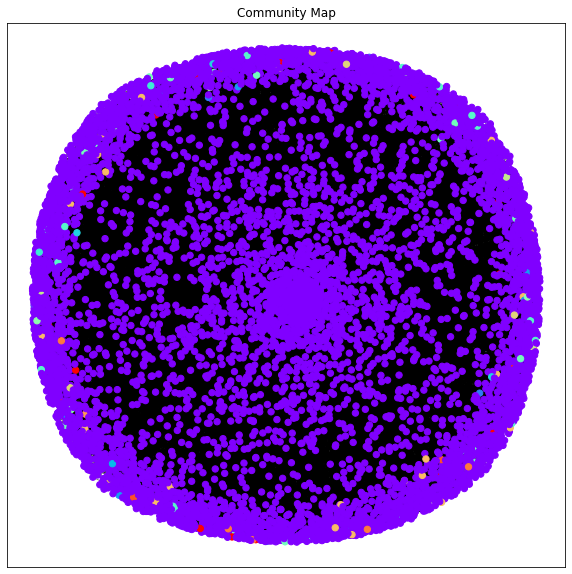

In [30]:
# Function to read a single graph from a file
def read_graph(file_path):
    if file_path.endswith(".gexf"):  # Assuming the graph is in GEXF format
        graph = nx.read_gexf(file_path)
        return graph
    else:
        raise ValueError("Unsupported file format. Please provide a GEXF file.")

# Function to perform spectral clustering and save the clusters to a file
def perform_spectral_clustering(graph, n_clusters, output_file):
    adjacency_matrix = nx.to_numpy_array(graph)
    clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
    labels = clustering.fit_predict(adjacency_matrix)
    
    # Save the clusters to a file
    with open(output_file, 'w', encoding='utf-8') as f:
        for node, label in zip(graph.nodes(), labels):
            f.write(f"{node},{label}\n")
    
    return labels

# Function to plot the graph with community detection
def plot_communities(graph, labels):
    pos = nx.spring_layout(graph)
    unique_labels = set(labels)
    cmap = plt.cm.rainbow
    community_map = {node: label for node, label in zip(graph.nodes(), labels)}
    node_colors = [community_map[node] for node in graph.nodes()]
    
    plt.figure(figsize=(10, 10))
    nx.draw_networkx_nodes(graph, pos, node_size=40, cmap=cmap, node_color=node_colors)
    nx.draw_networkx_edges(graph, pos, alpha=0.5)
    plt.title('Community Map')
    plt.show()

# Path to the single graph file
file_path = r'C:\Users\Shweta\Desktop\DA_ass\Community_Detection_Twitter\graphs\week_1.gexf'

# Read the graph
graph = read_graph(file_path)

# Perform spectral clustering and save the clusters to a file
n_clusters = 20  # You can set this to the ideal number of clusters you determined earlier
output_file = r'C:\Users\Shweta\Desktop\DA_ass\Community_Detection_Twitter\graphs\example_clusters.csv'
labels = perform_spectral_clustering(graph, n_clusters, output_file)

# Plot the graph with community detection
plot_communities(graph, labels)

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import json
import numpy as np
from collections import Counter

# Function to read a single graph from a file
def read_graph(file_path):
    if file_path.endswith(".gexf"):  # Assuming the graph is in GEXF format
        graph = nx.read_gexf(file_path)
        return graph
    else:
        raise ValueError("Unsupported file format. Please provide a GEXF file.")

# Function to perform spectral clustering and save the clusters to a file
def perform_spectral_clustering(graph, n_clusters, output_file):
    adjacency_matrix = nx.to_numpy_array(graph)
    np.fill_diagonal(adjacency_matrix, 0)  # Set diagonal elements to zero
    clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
    labels = clustering.fit_predict(adjacency_matrix)
    
    # Save the clusters to a JSON file
    clusters = {str(node): int(label) for node, label in zip(graph.nodes(), labels)}
    with open(output_file, 'w', encoding='utf-8') as f:
        json.dump(clusters, f, indent=4)
    
    return labels

# Function to plot the graph with community detection
def plot_communities(graph, labels):
    pos = nx.spring_layout(graph)
    unique_labels = set(labels)
    cmap = plt.cm.viridis
    community_map = {node: label for node, label in zip(graph.nodes(), labels)}
    node_colors = [community_map[node] for node in graph.nodes()]
    
    plt.figure(figsize=(10, 10))
    nx.draw_networkx_nodes(graph, pos, node_size=40, cmap=cmap, node_color=node_colors)
    nx.draw_networkx_edges(graph, pos, alpha=0.5)
    plt.title('Community Map')
    plt.show()

# Function to get the best number of clusters using silhouette score
def get_best_cluster_number(graph, cluster_range):
    adjacency_matrix = nx.to_numpy_array(graph)
    np.fill_diagonal(adjacency_matrix, 0)  # Set diagonal elements to zero
    best_score = -1
    best_n_clusters = 0
    
    for n_clusters in cluster_range:
        clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
        labels = clustering.fit_predict(adjacency_matrix)
        score = silhouette_score(adjacency_matrix, labels, metric='precomputed')
        
        print(f"Number of clusters: {n_clusters}, Silhouette Score: {score}")
        
        if score > best_score:
            best_score = score
            best_n_clusters = n_clusters
    
    return best_n_clusters, best_score

def visualize_communities(g, plotname):
    # Saving community info
    # with open(f"{plotname}.json", "w") as file:
    #     json.dump(labels, file, indent=4)
    with open(f"{plotname}.json", "r") as f:
        community_map = json.load(f)

    for node in g.nodes():
        if node in community_map:
            g.nodes[node]['community'] = community_map[node]
        else:
            g.nodes[node]['community'] = None  # Assign None if the node is not in the community map

    # Step 2: Count the number of nodes in each community
    community_counts = Counter(community_map.values())

    # Step 3: Assign community size as a node attribute
    for node in g.nodes():
        community_id = g.nodes[node].get('community')
        if community_id is not None:
            g.nodes[node]['community_size'] = community_counts.get(community_id, 0)
        else:
            g.nodes[node]['community_size'] = 0  # Or any default value if needed

    # Step 4: Remove edges between nodes that belong to different communities
    edges_to_remove = [
        (u, v) for u, v in g.edges() if community_map.get(u) != community_map.get(v)
    ]
    g.remove_edges_from(edges_to_remove)

    # Step 5: Save the modified graph as a GEXF file
    nx.write_gexf(g, f"{plotname}_spectral.gexf")

# Path to the single graph file
file_path = r'../graphs/week_1.gexf'
# Read the graph
graph = read_graph(file_path)
# Perform spectral clustering with the best number of clusters and save the clusters to a file
output_file = r'week_1_clusters.json'
# labels = perform_spectral_clustering(graph, 248 , output_file)
visualize_communities(graph, 'week_1_clusters')

file_path = r'../graphs/week_2.gexf'
# Read the graph
graph = read_graph(file_path)
# Perform spectral clustering with the best number of clusters and save the clusters to a file
output_file = r'week_2_clusters.json'
# labels = perform_spectral_clustering(graph, 324 , output_file)
visualize_communities(graph,'week_2_clusters')


file_path = r'../graphs/week_3.gexf'
# Read the graph
graph = read_graph(file_path)
# Perform spectral clustering with the best number of clusters and save the clusters to a file
output_file = r'week_3_clusters.json'
# labels = perform_spectral_clustering(graph, 370 , output_file)
visualize_communities(graph,'week_3_clusters')


file_path = r'../graphs/week_4.gexf'
# Read the graph
graph = read_graph(file_path)
# Perform spectral clustering with the best number of clusters and save the clusters to a file
output_file = r'week_4_clusters.json'
# labels = perform_spectral_clustering(graph, 283 , output_file)
visualize_communities(graph,'week_4_clusters')

file_path = r'../graphs/week_5.gexf'
# Read the graph
graph = read_graph(file_path)
# Perform spectral clustering with the best number of clusters and save the clusters to a file
output_file = r'week_5_clusters.json'
# labels = perform_spectral_clustering(graph, 346 , output_file)
visualize_communities(graph,'week_5_clusters')


file_path = r'../graphs/week_6.gexf'
# Read the graph
graph = read_graph(file_path)
# Perform spectral clustering with the best number of clusters and save the clusters to a file
output_file = r'week_6_clusters.json'
# labels = perform_spectral_clustering(graph, 223 , output_file)
visualize_communities(graph,'week_6_clusters')

# Plot the graph with community detection
# plot_communities(graph, labels)



# week1-248
# week2-324
# week3-370
# week4-283
# week5-346
# week6-223
